# Diffusivity Package

In the following code cells, the newly developed diffusivity package will be tested.

In [2]:
from PyQt5.QtWidgets import QFileDialog
import json as js
import numpy as np
import pandas as pd
from pathlib import Path, PureWindowsPath
from scipy import io
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erf
from scipy.constants import elementary_charge, Boltzmann
from math import pi
import matplotlib as mpl
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import os
from bisect import bisect_left, bisect_right
import re
import itertools


from diffusivity import DiffusivityMeasurement

### Testing the difusivity package

searching a file

In [3]:
%gui qt5
default_path = '\\\\file\\e24\\Projects\\FinleyLab\\_IQPGroup\\_SSPDs\\Data\\Diffusivity\\Data_measured\\Diffusivity sweeps'
filename = PureWindowsPath(default_path)
default_path = Path(filename)
filename_probe = QFileDialog.getOpenFileName(None, 'Import file', str(default_path),"JSON/MAT files (*.json *.txt *.mat)")
print(filename_probe[0])
file_to_import = filename_probe[0]
#filename_to_import = Path('testdata.dat')

//file/e24/Projects/FinleyLab/_IQPGroup/_SSPDs/Data/Diffusivity/Data_measured/Diffusivity sweeps/200722_S1_CL2_diffusweep_2007272nd_meas.json


importing a mat file

In [2]:
T2=DiffusivityMeasurement(file_to_import)

importing a json file

In [4]:
T2=DiffusivityMeasurement(file_to_import)

defining the fit function type

In [5]:
T2.RTfit.fit_function_type = 'richards'
#T2.RTfit.fit_function_type = 'gauss_cdf'

Determination of diffusivity and 

In [6]:
T2.calc_RT_fits()
#print(T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8))
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
D, dBc2dT, B_0, err_D, err_dBc2dT, r_squared = d_values
print(d_values)
print('D: ', D)
print('dBc2dT: ', dBc2dT)
print('B_0: ', B_0)
print('err_D: ', err_D)
print('err_dBc2dT: ', err_dBc2dT)
print('r_squared: ', r_squared)
print('\n')
print('Diffusivity', T2.diffusivity)
print('Err diffusivity', T2.diffusivity_err)
print('Film Tc: ', T2.Tc_0T)


C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:495: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:495: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:495: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.4891794870010161, -2.242925096223855, 15.333599437013884, 5.131987060641677e-07, 0.02353055039649568, 0.9883605141889723)
D:  0.4891794870010161
dBc2dT:  -2.242925096223855
B_0:  15.333599437013884
err_D:  5.131987060641677e-07
err_dBc2dT:  0.02353055039649568
r_squared:  0.9883605141889723


Diffusivity 0.4891794870010161
Err diffusivity 5.131987060641677e-07
Film Tc:  6.836429563710903


get Bc2vsT

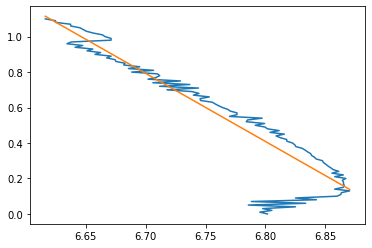

In [28]:
%matplotlib inline
T, Bc2 = T2.Bc2_vs_T()
plt.plot(T, Bc2)
T_fit, Bc2_fit = T2.get_Bc2vsT_fit()
plt.plot(T_fit, Bc2_fit)
# print(T2.Bc2_vs_T())
# print(T_fit, Bc2_fit)
#print(T2.Bc2_vs_T(err=True))

get RvsT

(4, 9)

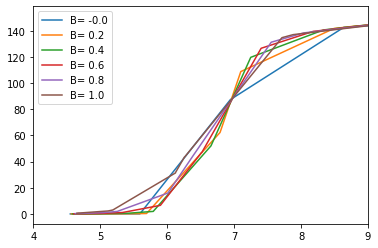

In [31]:
%matplotlib inline
# using default B
T, R = T2.R_vs_T()
for key, t, r in zip(T.keys(), T.values(), R.values()):
    plt.plot(t,r, label='B= '+ str(key))
plt.legend()
plt.xlim(4,9)

# B as scalar
# plt.plot(*T2.R_vs_T(B=0.1))

# B as list
# B=[1,2,3,4]
# T, R = T2.R_vs_T(B)
# for key, t, r in zip(T.keys(), T.values(), R.values()):
#     plt.plot(t,r, label='B= '+ str(key))
# plt.legend()

# Returning errors as well
# T, R, T_err, R_err = T2.R_vs_T(B=1, err=True)
# fig = plt.figure()
# ax=fig.add_subplot(111)
# ax.errorbar(T, R, yerr=R_err, xerr=T_err)

# print(T,R)
# print(T,R,T_err, R_err)

get R vs B

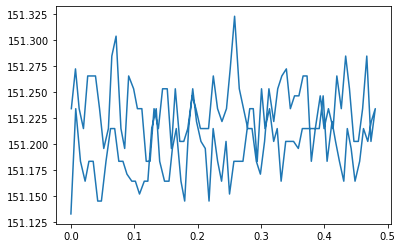

In [32]:
# print(T2.R_vs_B(9))
#print(T2.R_vs_B(9, err=True))
plt.plot(*T2.R_vs_B(10))

get Parameters

In [33]:
# take into account that you get back all the fitted b fields, not only the ones you asked for, since the function only adds parameters to the 
#print(T2.fit_function_parameters())
#print(T2.parameters_RTfit)
T2.RTfit.set_fit_parameters(b=5)
print(T2.fit_function_parameters(B=0.1))
#print(T2.fit_function_parameters(B='all'))

# T2.parameters_RTfit={}
# # shows dict_param is updated continuously
# T2.fit_function_parameters(B=[1,2,3,4])
# print(T2.parameters_RTfit)
# T2.fit_function_parameters(B=[2.5,3.5])
# print(T2.parameters_RTfit)
# print(T2.fit_function_parameters(B=2.3))
# print(T2.parameters_RTfit)

# T2.parameters_RTfit={}
# print(T2.fit_function_parameters(B=[2.3,2.7]))
# print(T2.parameters_RTfit)

{'b': 5.0, 'm': 75.62642369020502, 'nu': 1.0, 'k': 151.25284738041003}


C:\Users\Noah.Ploch\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:789: RuntimeWarning: overflow encountered in true_divide
  pcov = np.dot(VT.T / s**2, VT)


show changing fit area for RvsT fits works

In [34]:
T2.parameters_RTfit={}
B=0.5
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)
T2.set_RT_fit_limits(6,9)
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)
T2.set_RT_fit_limits(7,8)
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)

# check why always the same values

{0.5: {'b': 5.0, 'm': 75.62642369020502, 'nu': 1.0, 'k': 151.25284738041003}}


AttributeError: 'DiffusivityMeasurement' object has no attribute 'set_RT_fit_limits'

get Tc

In [40]:
print(T2.get_Tc())
print(T2.get_Tc(B=1.1))
print(T2.get_Tc(err=True))
print(T2.get_Tc(B=1, err=True))

[6.80164454 6.8672006  6.82260844 6.76427284 6.68831944 6.66612887]
6.616170213687243
(array([6.80164454, 6.8672006 , 6.82260844, 6.76427284, 6.68831944,
       6.66612887]), array([0.50120829, 0.56676435, 0.52217219, 0.46383659, 0.38788319,
       0.36569262]), array([1.10512296, 1.0395669 , 1.08415906, 1.14249466, 1.21844806,
       1.24063863]))
(6.666128873742632, 0.365692623742632, 1.2406386262573674)


fitting R vs T sweeps

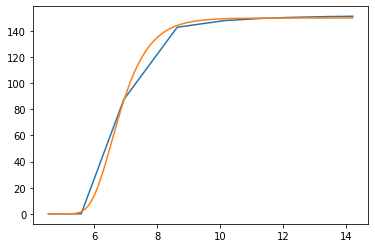

In [41]:
%matplotlib inline
# B=1
# T, R = T2.R_vs_T()
# T_fit, R_fit = T2.fit_function()
# for t,r,tf,rf in zip(T.values(), R.values(), T_fit.values(), R_fit.values()):
#     plt.plot(t,r,'x')
#     plt.plot(tf, rf)
# plt.xlim(7,9.5)
#print(T_fit, R_fit)

plt.plot(*T2.R_vs_T(B=0), *T2.fit_function(B=0))

Testing the fit area limits

In [46]:
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

# reducing fit area RvsT
T2.set_RT_fit_limits(6,9)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.set_RT_fit_limits(0,np.inf)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.set_RT_fit_limits(0,np.inf)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

#changing fit area Bc2vsT
T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8)
d_values=T2.get_Dfit_properties()
print(d_values)

(0.6318081011472605, -1.7365920854135404, 15.083871310545124, 1.915667468574908e-07, 0.0052654167589345135, 0.9962631634356204)
(0.6320200970877418, -1.7360095873662855, 15.079990965457917, 1.9288851784274937e-07, 0.005298190956440401, 0.9962141461627022)
(0.6318345880475809, -1.7365192863893437, 15.083386819689945, 1.9168775251304882e-07, 0.005268300999983711, 0.9962587712848283)
(0.631844704118941, -1.736491484062435, 15.083194344798237, 1.9168108943635406e-07, 0.005267949185807867, 0.9962591497375546)
(0.6317062196730558, -1.7368721626966888, 15.085693877548053, 1.9064103045450673e-07, 0.005241662794385933, 0.9962978687446974)
(0.655323985335244, -1.674275583536286, 14.666428922197973, 6.319566814891942e-08, 0.001614574874943268, 0.9998465807687579)
